# Linear Regression on AMES Housing Data

This notebook explores the use of linear and polynomial regression on the AMES Housing Dataset

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import *

# Elect to display numerous columns instead of truncating them
pd.set_option('display.max_columns', 3000)
# Elect to display numerous rows instead of truncating them
#pd.set_option('display.max_rows', None)

# Load and explore the AMES dataset

In [ ]:
df = pd.read_csv("https://www.seas.upenn.edu/~cis519/datasets/ames-train.csv")  # import file

# split df into training and testing portions
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.3, random_state = 42)

df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
135,136,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,6,1970,1970,Hip,CompShg,Plywood,Plywood,BrkFace,288.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,1304,1304,GasA,Gd,Y,SBrkr,1682,0,0,1682,0,0,2,0,3,1,TA,7,Typ,1,Gd,Attchd,1970.0,Unf,2,530,TA,TA,Y,98,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2008,WD,Normal,174000
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547,Unf,0,0,547,GasA,Gd,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2,525,TA,TA,Y,0,28,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
762,763,60,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2009,2009,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,24,Unf,0,732,756,GasA,Ex,Y,SBrkr,764,783,0,1547,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2009.0,Unf,2,614,TA,TA,Y,169,45,0,0,0,0,NaN,NaN,NaN,0,6,2010,Con,Normal,215200
932,933,20,RL,84.0,11670,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,RRNn,Norm,1Fam,1Story,9,5,2006,2006,Hip,CompShg,VinylSd,ImStucc,Stone,302.0,Ex,TA,PConc,Ex,Gd,No,Unf,0,Unf,0,1905,1905,GasA,Ex,Y,SBrkr,1905,0,0,1905,0,0,2,0,3,1,Ex,8,Typ,1,Gd,Attchd,2006.0,Fin,3,788,TA,TA,Y,0,191,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,320000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7,6,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385,ALQ,344,70,799,GasA,Ex,Y,SBrkr,827,834,0,1661,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,Y,158,61,0,0,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
629,630,80,RL,82.0,9020,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Feedr,Norm,1Fam,SLvl,6,5,1964,1964,Gable,WdShngl,Plywood,Wd Sdng,BrkFace,259.0,TA,TA,CBlock,TA,TA,Gd,GLQ,624,Rec,336,288,1248,GasA,TA,Y,SBrkr,1350,0,0,1350,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1964.0,RFn,2,520,TA,TA,Y,176,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,168500
1210,1211,60,RL,70.0,11218,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,5,1992,1992,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1055,1055,GasA,Ex,Y,SBrkr,1055,790,0,1845,0,0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,1992.0,RFn,2,462,TA,TA,Y,635,104,0,0,0,0,NaN,GdPrv,Shed,400,5,2010,WD,Normal,189000
1118,1119,80,RL,85.0,13825,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1958,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0,Unf,0,533,533,GasA,TA,Y,SBrkr,1021,580,0,1601,0,1,1,0,3,1,TA,6,Min2,0,NaN,BuiltIn,1958.0,RFn,1,300,TA,TA,Y,280,34,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,140000
1084,1085,60,RL,NaN,13031,Pave,NaN,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,592,Unf,0,99,691,GasA,Gd,Y,SBrkr,691,807,0,1498,0,0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1995.0,Fin,2,409,TA,TA,Y,315,44,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,187500
158,159,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,G

In [ ]:
print('Train size = ' + str(df_train.shape))
print('Test size = '+ str(df_test.shape))
print('Training Data:')
df_train.describe()

Train size = (1022, 81)
Test size = (438, 81)
Training Data:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1022.000000,1022.000000,832.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1019.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,968.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000,1022.000000
mean,732.338552,57.059687,70.375000,10745.437378,6.128180,5.564579,1970.995108,1984.757339,105.261040,446.176125,42.368885,571.223092,1059.768102,1169.737769,353.738748,5.766145,1529.242661,0.422701,0.059687,1.582192,0.374755,2.890411,1.045010,6.545010,0.613503,1978.676653,1.783757,477.120352,97.548924,49.525440,21.303327,3.881605,15.565558,2.743640,41.565558,6.363992,2007.814090,181312.692759
std,425.860402,42.669715,25.533607,11329.753423,1.371391,1.110557,30.748816,20.747109,172.707705,459.971174,151.210531,446.004532,447.423437,389.550515,441.124963,47.949564,530.971805,0.519354,0.241119,0.544401,0.494305,0.811116,0.212096,1.630221,0.650724,24.814634,0.730751,208.443296,131.691873,69.205968,61.534380,32.547722,56.445749,39.671531,338.132358,2.650115,1.325807,77617.461005
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,367.500000,20.000000,59.000000,7564.250000,5.000000,5.000000,1953.000000,1966.000000,0.000000,0.000000,0.000000,223.250000,795.000000,889.750000,0.000000,0.000000,1142.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,350.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,735.500000,50.000000,70.000000,9600.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,390.000000,0.000000,483.500000,995.000000,1096.500000,0.000000,0.000000,1476.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,165000.000000
75%,1100.500000,70.000000,80.000000,11692.500000,7.000000,6.000000,2001.000000,2004.000000,170.000000,724.000000,0.000000,809.500000,1294.000000,1392.000000,731.250000,0.000000,1794.250000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,170.500000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1378.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,2.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,8300.000000,12.000000,2010.000000,745000.000000


In [ ]:
# Examine the dataset for missing features
print('Percentage of instances with missing features:')
percent_missing_values = (df_train.isnull().sum(axis=0)/df_train.shape[0]).sort_values(ascending=False)
percent_missing_values = percent_missing_values[percent_missing_values > 0]
print(percent_missing_values)
print()

Percentage of instances with missing features:
PoolQC          0.995108
MiscFeature     0.960861
Alley           0.935421
Fence           0.802348
FireplaceQu     0.476517
LotFrontage     0.185910
GarageCond      0.052838
GarageType      0.052838
GarageYrBlt     0.052838
GarageFinish    0.052838
GarageQual      0.052838
BsmtFinType1    0.025440
BsmtExposure    0.025440
BsmtCond        0.025440
BsmtQual        0.025440
BsmtFinType2    0.025440
MasVnrArea      0.002935
MasVnrType      0.002935
Electrical      0.000978
dtype: float64



In [ ]:
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'MiscVal'], axis = 1)        # drop features with majority NA values. MiscVal goes with MiscFeature
df_test = df_test.drop(['PoolQC', 'MiscFeature', 'MiscVal'], axis = 1)          # drop features with majority NA values. MiscVal goes with MiscFeature

df_train = df_train.drop(['Id'], axis = 1)   # Drop the Id field
df_test = df_test.drop(['Id'], axis = 1)

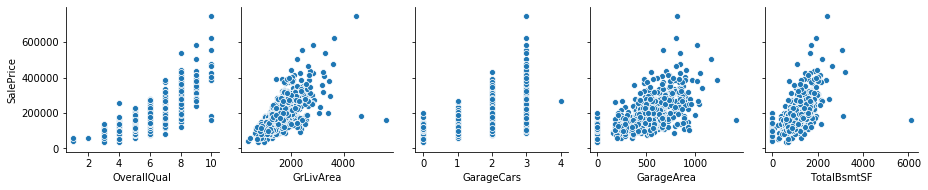

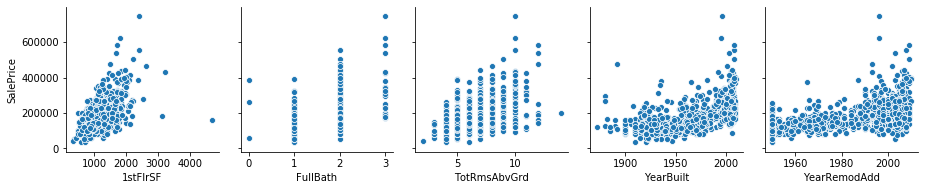

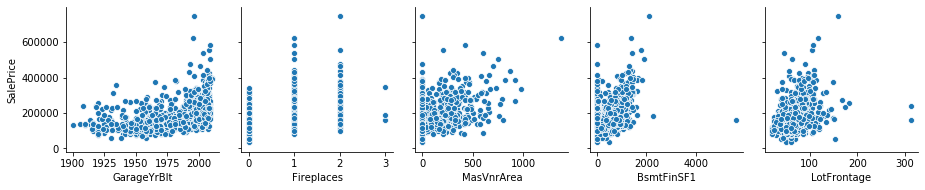

In [ ]:
# Identify the features most correlated with SalePrice
correlations = df_train.corr()['SalePrice'].abs()        # view the correlation score of each feature with target variable
correlations = correlations[correlations.abs() > 0.34].sort_values(ascending=False)
correlations_cols = correlations.keys().tolist()
correlations_cols.remove('SalePrice')

# Divide those features into sets of 5
column_sets_to_plot = [correlations_cols[i:i+5] 
                   for i in range(0, len(correlations_cols), 5)] 

# Plot each set of five features against the SalePrice
import seaborn as sns
for column_set in column_sets_to_plot:
  sns.pairplot(df_train, x_vars=column_set, y_vars='SalePrice')

In [ ]:
null_cols = df_train.columns[df_train.isna().any()].tolist()
null_cols_test = df_test.columns[df_test.isna().any()].tolist()
for col in null_cols_test:
    if col not in null_cols:
        null_cols.append(col)

print(null_cols)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']


In [ ]:
# This is a quick and dirty way to pick out the numeric vs categorical columns, 
# but note that it will make mistakes.  For example, any binary encoded column
# is counted as numeric, ordinals are ignored, etc. This step must be done
# prior to one-hot encoding any categorical features.
#
# Once you get the output, you must MANUALLY check to confirm that the cols it
# identified as each type truly are correct.
# 
# The best way is to use the data dictionary

cols = df_train.columns
numeric_cols = df_train._get_numeric_data().columns
print('Numeric Columns')
print(numeric_cols)

print()
print('Categorical Columns')
print(list(set(cols) - set(numeric_cols)))

Numeric Columns
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

Categorical Columns
['RoofMatl', 'Condition1', 'Condition2', 'RoofStyle', 'GarageCond', 'GarageFinish', 'LandSlope', 'LotConfig', 'BsmtQual', 'BsmtExposure', 'Functional', 'LotShape', 'GarageQual', 'Street', 'Exterior2nd', 'HeatingQC', 'Alley', 'Heating', 'LandContour', 'BsmtCond', 'BsmtFinType1', 'PavedDrive', 'ExterQual', 'MasVnrType', 'ExterCond', 'Exterior1st', 'BsmtFinType2', 'Foundation', 'Gar

In [ ]:
# Print dataset subset before ordinal encoding
print(df_train[['HouseStyle','FullBath', 'RoofMatl','BsmtCond','KitchenQual']].head(10))


# Based on the AMES data dictionary, specify the ordinal encoding, and identfy ordinal/categorical/numeric features

#ORDINALS (19)
ordinals = {
  'LotShape': {'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4},
  'LandSlope': {'Sev':1, 'Mod':2, 'Gtl':3},
  'ExterQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'ExterCond': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'BsmtQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'BsmtCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'BsmtExposure': {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4},
  'BsmtFinType1': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
  'BsmtFinType2': {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6},
  'HeatingQC': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},       
  'KitchenQual': {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, 
  'Functional': {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8},
  'FireplaceQu': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'GarageFinish': {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3},
  'GarageQual': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'GarageCond': {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
  'PavedDrive': {'N':0, 'P':1, 'Y':2},
  'Fence': {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}}

  #  'PoolQC': {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},

ordinal_cols = ordinals.keys()
       


#CATEGORICAL (25)
categorical_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 
                    'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
                    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                    'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
                    'GarageType', 'SaleType', 'SaleCondition']



	

#NUMERIC (35)
numeric_cols = ['LotFrontage', 'LotArea', 'OverallQual', 
                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 
                'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
                'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
                'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
                'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MoSold', 'YrSold', 'SalePrice']


# Replace ordinals in the dataset
for col,ordinal_map in ordinals.items():
  df_train[col] = df_train[col].replace(ordinal_map)
  df_test[col] = df_test[col].replace(ordinal_map)


# Print dataset subset after ordinal encoding for comparison
print(df_train[['HouseStyle','FullBath', 'RoofMatl','BsmtCond','KitchenQual']].head(10))


     HouseStyle  FullBath RoofMatl BsmtCond KitchenQual
135      1Story         2  CompShg       TA          TA
1452       SLvl         1  CompShg       TA          TA
762      2Story         2  CompShg       TA          Gd
932      1Story         2  CompShg       Gd          Ex
435      2Story         2  CompShg       TA          Gd
629        SLvl         1  WdShngl       TA          TA
1210     2Story         2  CompShg       TA          Gd
1118       SLvl         1  CompShg       TA          TA
1084     2Story         2  CompShg       TA          TA
158      2Story         2  CompShg       TA          Gd
     HouseStyle  FullBath RoofMatl BsmtCond  KitchenQual
135      1Story         2  CompShg        3            3
1452       SLvl         1  CompShg        3            3
762      2Story         2  CompShg        3            4
932      1Story         2  CompShg        4            5
435      2Story         2  CompShg        3            4
629        SLvl         1  WdShngl        

In [ ]:
# Impute missing values

values_dict = {}      # create a dictionary to use for imputing each column
for col in numeric_cols: 
    values_dict[col] = df_train[col].mean()  # take the mean of numeric cols
for col in categorical_cols:
    values_dict[col] = df_train[col].mode()[0]  # take the mode of categorical vars
for col in ordinal_cols:
    values_dict[col] = df_train[col].mode()[0]  # take the mode of ordinal vars

    
df_train = df_train.fillna(values_dict)     # use the dictionary with fillna funciton
df_test = df_test.fillna(values_dict)

In [ ]:
print('Train size before OHE encoding = ' + str(df_train.shape))
print('Test size before OHE encoding = ' + str(df_test.shape))
for col in categorical_cols:
    dummies_train = pd.get_dummies(df_train[col], prefix = col)      # one hot encode all string valued columns
    #if col == 'ExterQual':
    #  print(dummies_train)
    df_train = pd.concat([df_train, dummies_train], axis = 1)

# One-hot encode the test set
for col in categorical_cols:
    dummies_test = pd.get_dummies(df_test[col], prefix = col)      # one hot encode all string valued columns
    df_test = pd.concat([df_test, dummies_test], axis = 1)

df_train = df_train.drop(categorical_cols, axis = 1)      # drop the non OHE columns
df_test = df_test.drop(categorical_cols, axis = 1)        # drop the non OHE columns

# The problem is that values that were present in the training set and not in the test set (or vice versa)
# can cause the set of columns appended by one-hot encoding to differ.  Therefore, we must fix the test set
# columns to exactly match the training set columns.
# Get missing cols in the training test
missing_cols = set(df_train.columns) - set(df_test.columns)
# Add missing columns into the test set with a value of 0 (false)
for col in missing_cols:
    df_test[col] = 0
# Ensure the column order in the test set matches the column order in the training set, 
# and that there aren't additional columns in the test set that aren't in the training set
df_test = df_test[df_train.columns]

print('Train size after OHE encoding = ' + str(df_train.shape))
print('Test size after OHE encoding = ' + str(df_test.shape))

Train size before OHE encoding = (1022, 77)
Test size before OHE encoding = (438, 77)
Train size after OHE encoding = (1022, 227)
Test size after OHE encoding = (438, 227)


In [ ]:
# Confirm that we have no missing values in the training or testing data at this point
print('df_train: num missing values = ' + str(df_train.isna().sum().sum()))
print()
print('df_test: num missing values = ' + str(df_test.isna().sum().sum()))

df_train: num missing values = 0

df_test: num missing values = 0


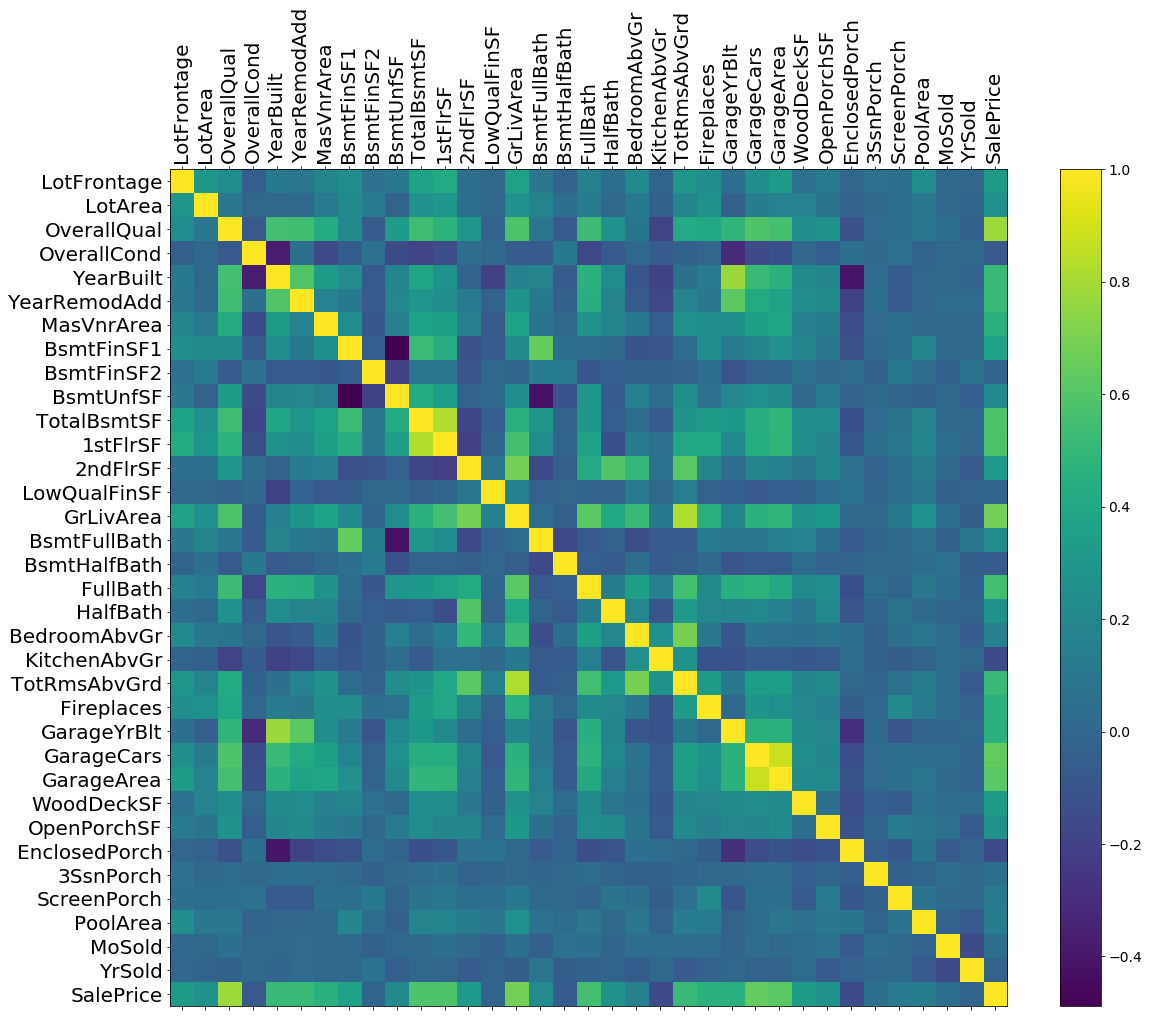

In [ ]:
f = plt.figure(figsize = (19,15))         # produce a correlation matrix for numeric columns
plt.matshow(df_train[numeric_cols].corr(),fignum=f.number)
plt.xticks(range(len(numeric_cols)), numeric_cols, fontsize=20, rotation = 90)
plt.yticks(range(len(numeric_cols)), numeric_cols,  fontsize=20)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
f.show()

# Train basic linear regression model

In [ ]:
X_train = df_train.copy()
X_train = X_train.drop('SalePrice', axis=1)        # drop the target variable before running a model
y_train = df_train['SalePrice']                    # set the target variable

X_test = df_test.copy()
X_test = X_test.drop('SalePrice', axis=1)        # drop the target variable 
y_test = df_test['SalePrice']                    # set the target variable


# Fit model
lr = linear_model.LinearRegression()      # fit linear regression on all features
lr.fit(X_train, y_train)

# Evaluate
print(lr.score(X_test, y_test))


# # Standardize data myself
# means = X_train.mean()
# stdevs = X_train.std()
# X_train_standard = (X_train - means) / stdevs  # compute mean and stdev on training set for standardization
# X_test_standard = (X_test - means) / stdevs    # standardize test data in same manner as training data


# # Standardize data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train_standard = standardizer.fit_transform(X_train)  # compute mean and stdev on training set for standardization
X_test_standard = standardizer.transform(X_test)        # standardize test data in same manner as training data
     

# Fit model
lr2 = linear_model.LinearRegression()      # fit linear regression on all features
lr2.fit(X_train_standard, y_train)

# Evaluate
print(lr2.score(X_test_standard, y_test))



0.8760563779972625
-8.610114724781942e+20


Text(0.5, 0, 'Test instance')

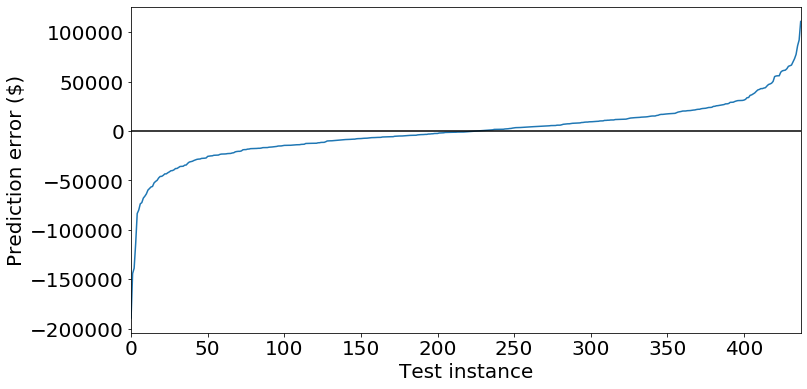

In [ ]:
# Plot errors in sorted order

errors_orig = lr.predict(X_test) - y_test
plot = errors_orig.sort_values(ascending=True).plot(use_index=False,figsize=(12,6),fontsize=20)
plot.axhline(color='black')
plot.set_ylabel("Prediction error ($)", fontsize=20)
plot.set_xlabel("Test instance", fontsize=20)

Intercept = -2793179.681789209


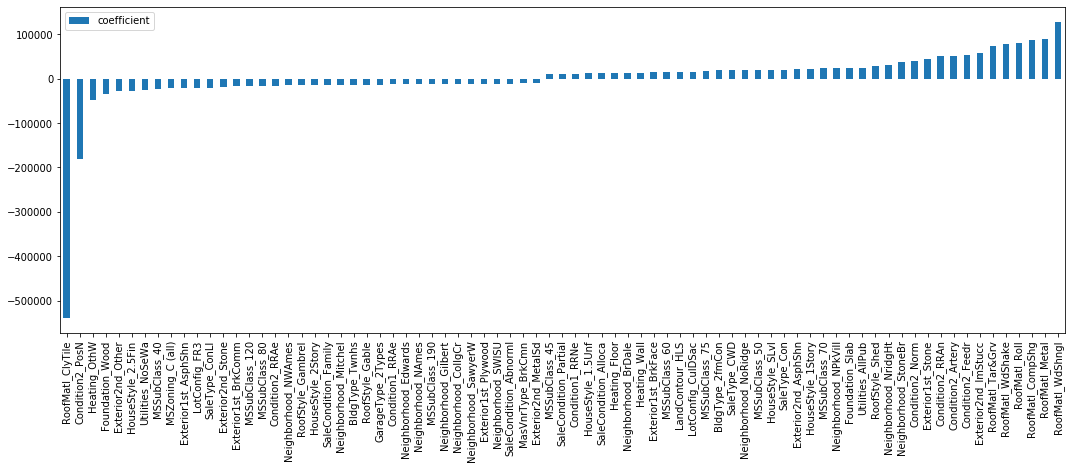

In [ ]:
# Plot coefficients

coefs = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['coefficient'])
coefs = coefs.sort_values(by='coefficient')
pd.set_option('display.max_rows', None)
coefs[coefs['coefficient'].abs() > 10000].plot(kind='bar',figsize=(18,6))

print('Intercept = ' + str(lr.intercept_))


['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'BsmtFinSF1',
 'LotFrontage']

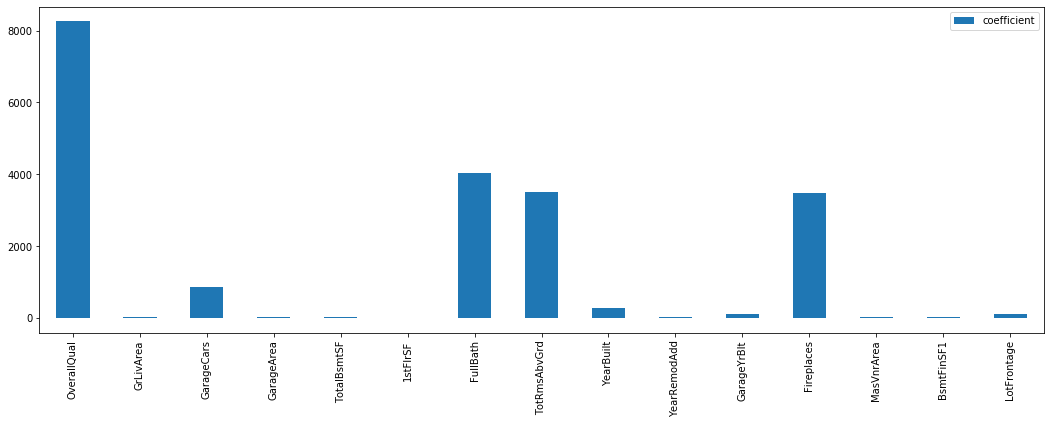

In [ ]:
coefs = pd.DataFrame(lr.coef_, index=X_train.columns, columns=['coefficient'])
coefs = coefs.sort_values(by='coefficient')
pd.set_option('display.max_rows', None)
coefs_to_plot = coefs.loc[correlations_cols,:]
coefs_to_plot.plot(kind='bar',figsize=(18,6))

correlations_cols

# Train regularized linear regression

In [ ]:
# Fit model
rr = linear_model.Ridge()      # fit linear regression on all features
rr.fit(X_train, y_train)

# Evaluate
print(rr.score(X_test, y_test))


# Fit model
rr2 = linear_model.Ridge()      # fit linear regression on all features
rr2.fit(X_train_standard, y_train)

# Evaluate
print(rr2.score(X_test_standard, y_test))

0.8737246418768105
0.8818292647847474


Text(0.5, 0, 'Test instance')

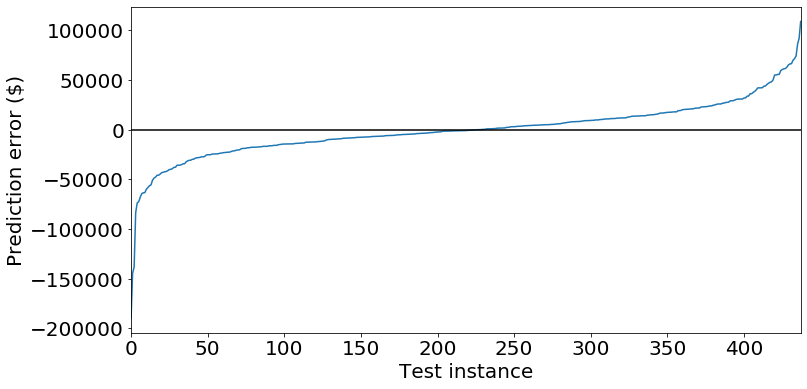

In [ ]:
errors = rr2.predict(X_test_standard) - y_test
plot = errors.sort_values(ascending=True).plot(use_index=False,figsize=(12,6),fontsize=20)
plot.axhline(color='black')
plot.set_ylabel("Prediction error ($)", fontsize=20)
plot.set_xlabel("Test instance", fontsize=20)

# Create polynomial features and train polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# # Standardize data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train_poly = standardizer.fit_transform(X_train_poly)  # compute mean and stdev on training set for standardization
X_test_poly = standardizer.transform(X_test_poly)    # standardize test data in same manner as training data
   


# Fit model
rr_poly = linear_model.Ridge(alpha=1000)      # fit linear regression on all features
rr_poly.fit(X_train_poly, y_train)

# Evaluate
print(rr_poly.score(X_test_poly, y_test))


0.8985597939609372


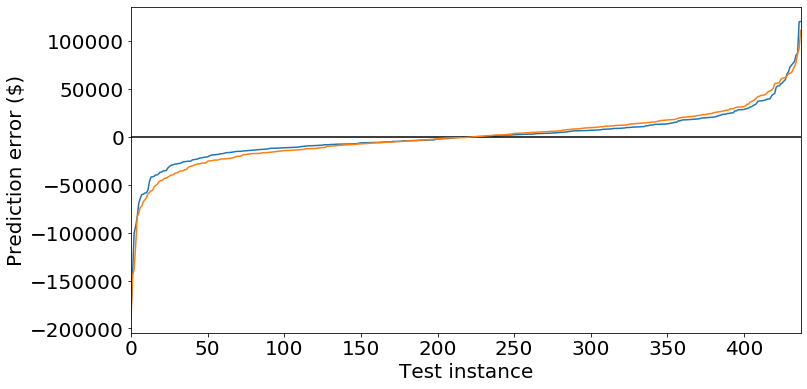

In [ ]:
errors_poly = rr_poly.predict(X_test_poly) - y_test
plot = errors_poly.sort_values(ascending=True).plot(use_index=False,figsize=(12,6),fontsize=20)
plot.axhline(color='black')
plot.set_ylabel("Prediction error ($)", fontsize=20)
plot.set_xlabel("Test instance", fontsize=20)
errors_orig.sort_values(ascending=True).plot(use_index=False)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# # Standardize data
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_train_poly = standardizer.fit_transform(X_train_poly)  # compute mean and stdev on training set for standardization
X_test_poly = standardizer.transform(X_test_poly)    # standardize test data in same manner as training data
   


# Fit model
rr_poly = linear_model.Ridge(alpha=1000)      # fit linear regression on all features
rr_poly.fit(X_train_poly, y_train)

# Evaluate
print(rr_poly.score(X_test_poly, y_test))

0.8985597939609372
